- 고객 세분화를 해서 Market Basket Analysis 전략을 수립
- 타겟 고객을 식별해서 이들한테 적합한 마케팅 전략을 수립

- 어떻게 고객을 세분화 할 것인가? --> 우리가 수집한 데이터 기반으로
- 타겟 고객은 누구? --> 우리가 데이터 분석 제공하면 마케팅 부서
- 실제 마케팅 전략은? --> 전략기획실이나 기타 등등

In [65]:
import pandas as pd
df = pd.read_csv(r'C:\Github\python_study\Pandas\Mall_Customers.csv')
df.head()
# Spending Score (1-100) : 고객의 지출점수 고객의 구매행동 및 기타 매개변수를 바탕으로 제작
# 지출점수 공식이 있음

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [66]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [68]:
import missingno
import matplotlib.pyplot as plt

In [69]:
from sklearn.preprocessing import LabelEncoder
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [70]:
X = df.drop(columns=['CustomerID','Spending Score (1-100)'])
y = df['Spending Score (1-100)']
X.head(), y.head()

(   Gender  Age  Annual Income (k$)
 0       1   19                  15
 1       1   21                  15
 2       0   20                  16
 3       0   23                  16
 4       0   31                  17,
 0    39
 1    81
 2     6
 3    77
 4    40
 Name: Spending Score (1-100), dtype: int64)

<Axes: >

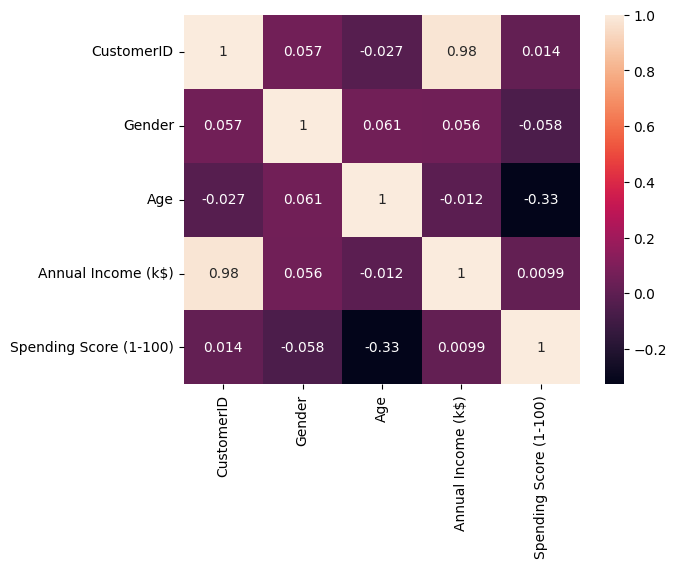

In [71]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

In [72]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_ss = ss.fit_transform(X)
x_ss

array([[ 1.12815215, -1.42456879, -1.73899919],
       [ 1.12815215, -1.28103541, -1.73899919],
       [-0.88640526, -1.3528021 , -1.70082976],
       [-0.88640526, -1.13750203, -1.70082976],
       [-0.88640526, -0.56336851, -1.66266033],
       [-0.88640526, -1.20926872, -1.66266033],
       [-0.88640526, -0.27630176, -1.62449091],
       [-0.88640526, -1.13750203, -1.62449091],
       [ 1.12815215,  1.80493225, -1.58632148],
       [-0.88640526, -0.6351352 , -1.58632148],
       [ 1.12815215,  2.02023231, -1.58632148],
       [-0.88640526, -0.27630176, -1.58632148],
       [-0.88640526,  1.37433211, -1.54815205],
       [-0.88640526, -1.06573534, -1.54815205],
       [ 1.12815215, -0.13276838, -1.54815205],
       [ 1.12815215, -1.20926872, -1.54815205],
       [-0.88640526, -0.27630176, -1.50998262],
       [ 1.12815215, -1.3528021 , -1.50998262],
       [ 1.12815215,  0.94373197, -1.43364376],
       [-0.88640526, -0.27630176, -1.43364376],
       [ 1.12815215, -0.27630176, -1.395

In [73]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
km.fit(x_ss)

KMeans(n_clusters=3)

In [74]:
km.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2,
       2, 1, 2, 2, 1, 1, 1, 1, 1, 0, 1, 0, 2, 1, 1, 0, 1, 1, 2, 1, 1, 2,
       2, 1, 1, 0, 0, 2, 2, 0, 1, 2, 0, 0, 2, 1, 1, 0, 0, 2, 1, 1, 1, 1,
       1, 2, 2, 0, 2, 2, 1, 1, 1, 1, 0, 2, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0,
       2, 2, 0, 2, 1, 0, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 1, 2,
       1, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 1, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

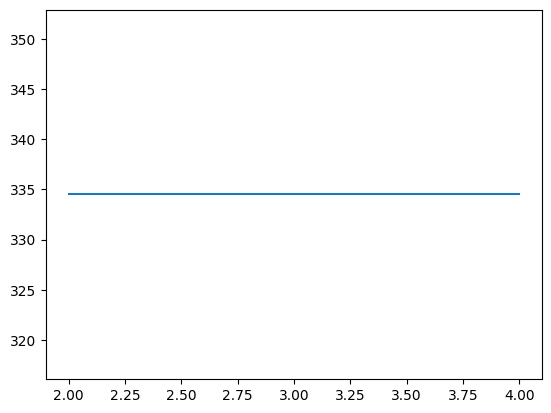

In [75]:
import matplotlib.pyplot as plt
result = []
for k in range(2,5):
    kn = KMeans(n_clusters=k, random_state=42)
    kn.fit(x_ss)
    result.append(km.inertia_)

plt.plot(range(2,5), result)

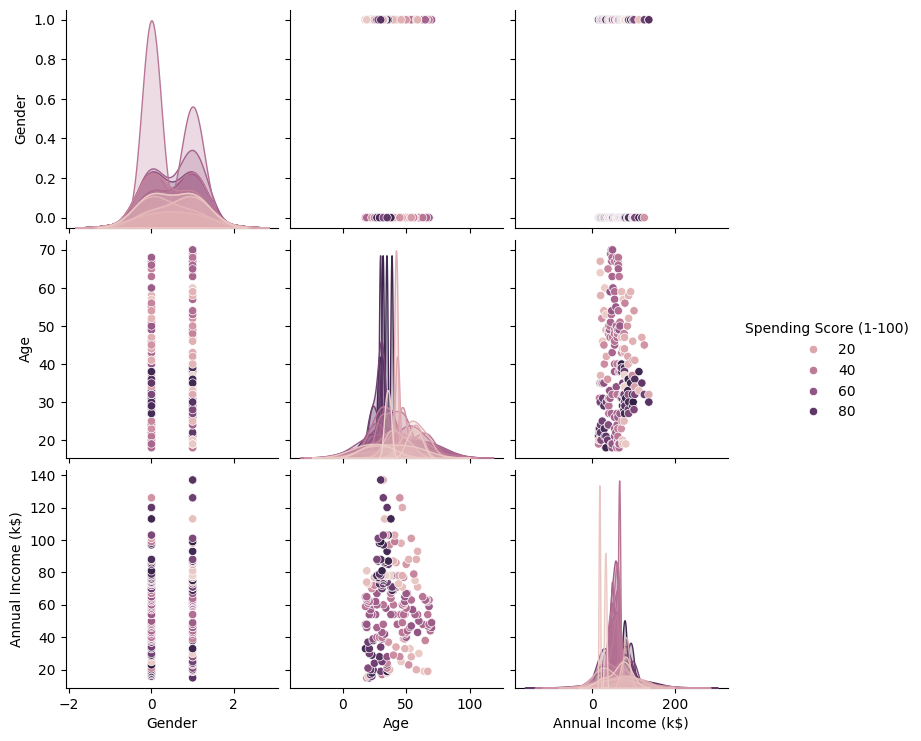

In [76]:
df2 = df.drop(columns=['CustomerID'])
sns.pairplot(df2, hue='Spending Score (1-100)')

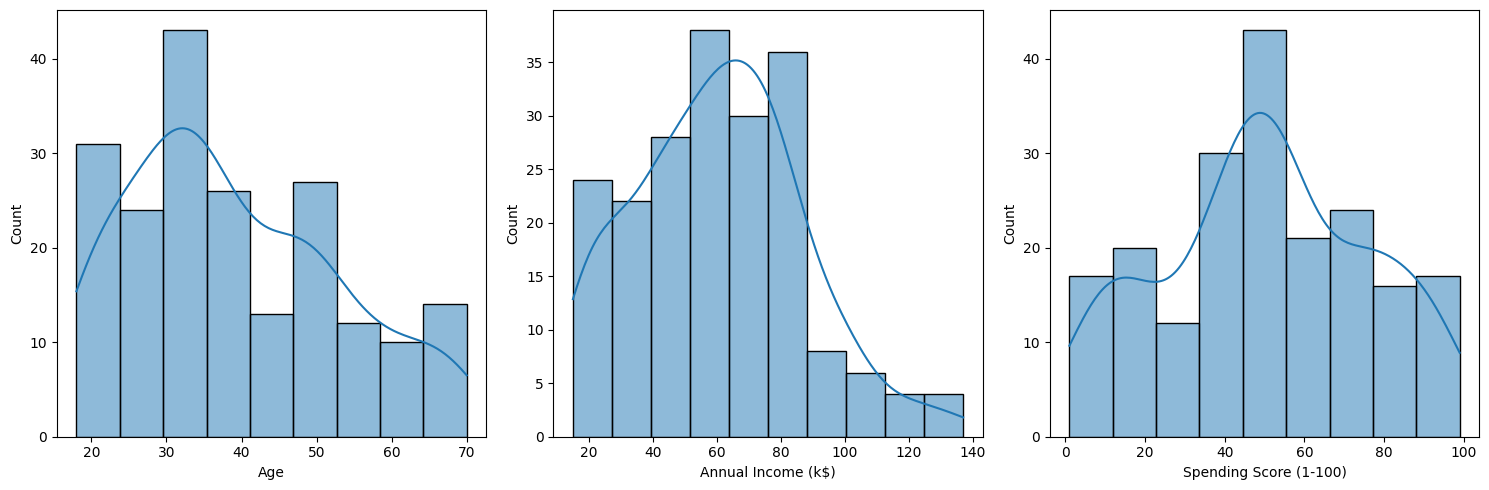

In [80]:
# 밀도 그래프
import seaborn as sns
_, ax = plt.subplots(1,3,figsize=(15,5))
for i, col in enumerate(['Age', 'Annual Income (k$)', 'Spending Score (1-100)']):
    sns.histplot(df[col], ax=ax[i],kde=True)
plt.tight_layout()
plt.show()

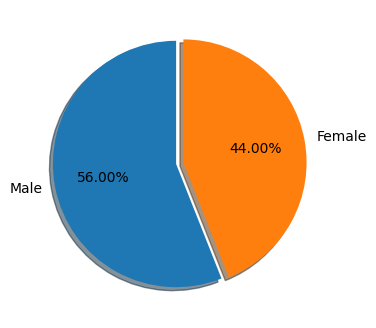

In [32]:
# 범주형 데이터
values = df['Gender'].value_counts()
labels = ['Male','Female']
_, ax = plt.subplots(figsize=(4,4),dpi = 100)
explode = (0,0.06)
ax.pie(values,labels=labels, explode=explode, startangle=90, shadow=True, autopct='%1.2f%%')
plt.show()

In [81]:
# 나이는 구간별로 나눠서 histogram으로 표현해주면 좋음
import numpy as np
labels = ['18-20','21-30','31-40','41-50','51-60','61-70','70+']
cnt, bins = np.histogram(df['Age'], bins=6)
cnt, bins
# # pd.cut(df['Age'],bins=bins,labels=list(range(len(bins)-1)), include_lowest=True)
# label = [f'{np.round(bins[i])}-{np.round(bins[i+1])}' for i in range(len(bins)-1)]
# plt.figure(figsize=(12,5))
# plt.bar(x=label, height=cnt)


(array([40, 58, 31, 35, 19, 17], dtype=int64),
 array([18.        , 26.66666667, 35.33333333, 44.        , 52.66666667,
        61.33333333, 70.        ]))

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

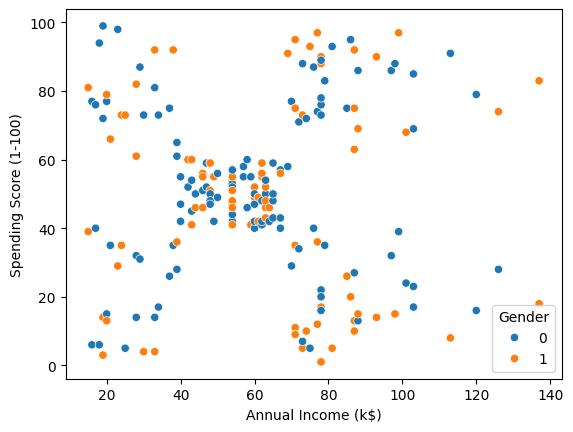

In [42]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender')
# 선형관계가 없음 -> 군집 이용

kmeans

In [46]:
from sklearn.preprocessing import LabelEncoder
df_encode = LabelEncoder().fit_transform(df['Gender'])
df_encode_scaled = StandardScaler().fit_transform(df_encode)
df

ValueError: Expected 2D array, got 1D array instead:
array=[1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1.
 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0.
 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1.
 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0.
 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0.
 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 1. 1. 1.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

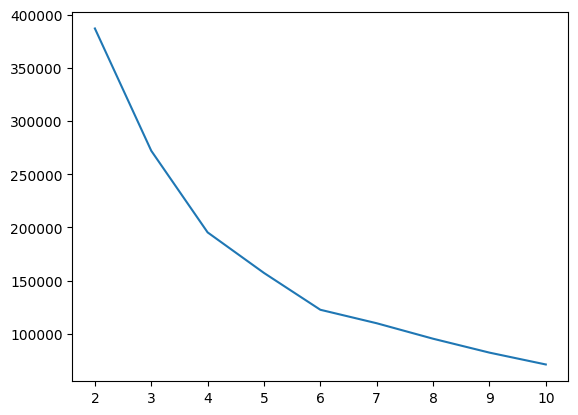

In [63]:
from sklearn.cluster import KMeans
result = []
for k in range(2,11):
    km = KMeans(n_clusters=k)
    km.fit(df)
    result.append(km.inertia_)
plt.plot(range(2,11), result)
plt.show()

In [ ]:
km = KMeans(n_clusters=4)
km.fit(df)


In [52]:
plt.scatter(df_encode_scaled[:,2],df_encode_scaled[:,3])

NameError: name 'df_encode_scaled' is not defined

In [45]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [ ]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)',hue='Cluster')

In [59]:
km = KMeans(n_clusters=4)
km.fit(x_ss)
df_x_ss = pd.DataFrame(x_ss)
df_x_ss
plt.scatter(df_x_ss[:,0],df_x_ss[:,1], c=km.labels_)

KeyError: (slice(None, None, None), 0)

In [82]:
!pip install plotly

In [83]:
import plotly.express as px

In [ ]:
df = pd.DataFrame(df2_scaled)

In [ ]:
px.scatter_3d()

In [ ]:
# age 연간, 소비지수
# px.scatter_3d()